In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 38.3MB/s]


In [ ]:
! unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection


# Read the Data

In [ ]:
dataset = pd.read_csv('/content/Crop_recommendation.csv')
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# show the dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Preprocessing the Dataset 

In [ ]:
# drop the na values 
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5843f77e50>,
      dtype=object)

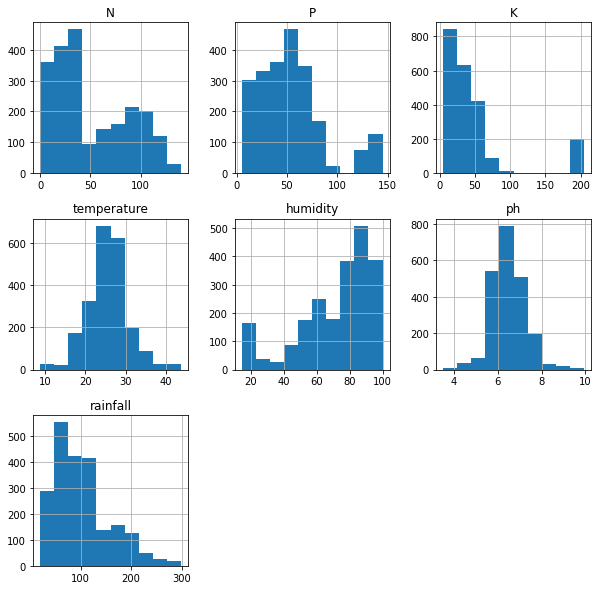

In [ ]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [ ]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
dataset .iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [ ]:

dataset.label=dataset.label.factorize()[0]

In [ ]:
# split the data to features and labels 
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [ ]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.StandardScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5842b314d0>,
      dtype=object)

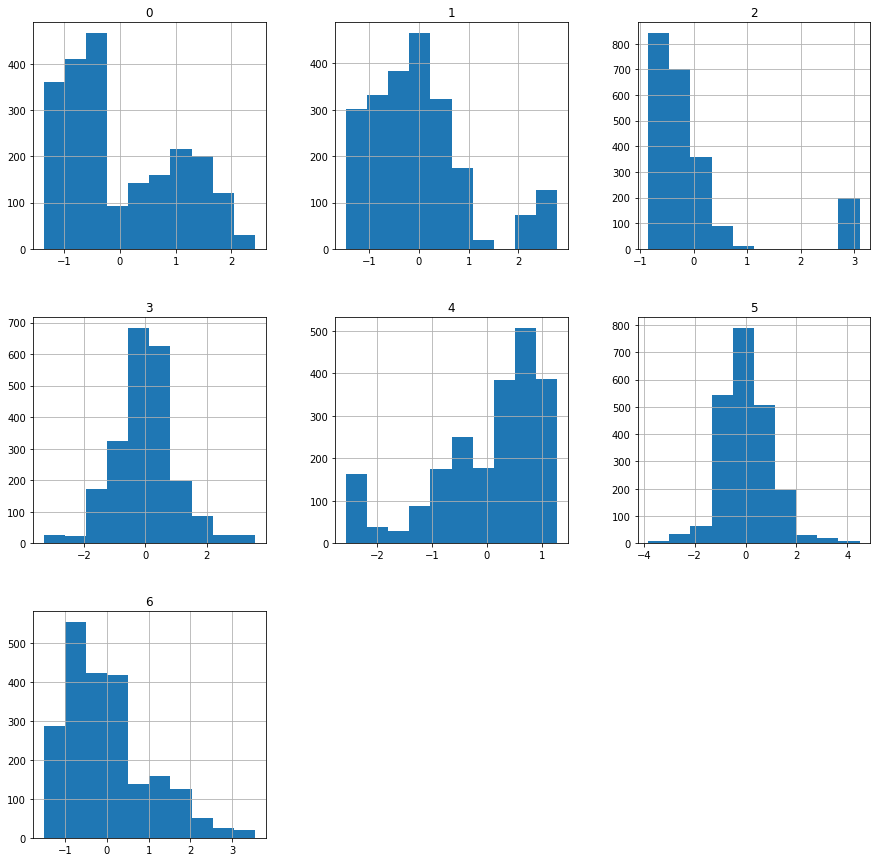

In [ ]:
pd.DataFrame(x_norm).hist(figsize=(15,15))

(array([300., 200., 200., 200., 200., 200., 200., 200., 200., 300.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

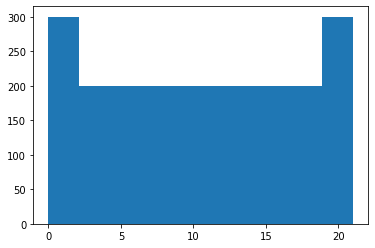

In [ ]:
plt.hist(y)

In [ ]:
len(set(y))

22

# Spilt the Data to Train & Test 

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train = tf.one_hot(y_train,depth=len(set(y)))
y_test = tf.one_hot(y_test,depth=len(set(y)))

# Create the Data Pipeline

In [ ]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [ ]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [ ]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[ 1.09589110e+00 -9.81331475e-01 -4.37414249e-01  1.41732769e-01
  -6.34226046e-01  1.02335584e+00  1.60505682e+00]
 [-4.48450078e-01  2.41483240e+00  3.03834501e+00 -2.03494529e+00
   3.87053832e-01 -8.59025279e-01 -5.21280217e-01]
 [ 2.28892546e-01  2.61907086e-01  1.68042906e-02  3.50497370e+00
   9.82541073e-01  6.10028509e-01  2.05919209e-01]
 [ 9.87516284e-01 -2.83904965e-01 -1.01687502e-01 -3.43973457e-01
   6.87856843e-01  3.22121268e-01  1.34770894e+00]
 [ 7.97860349e-01 -7.08425449e-01 -4.57162881e-01  1.23390784e-01
  -2.62277323e-01  1.31537504e+00  8.17412538e-01]
 [-3.12981553e-01 -7.08425449e-01 -2.00430663e-01 -1.08438297e+00
   7.23963217e-01  6.40606308e-01  8.37537263e-02]
 [-1.15288641e+00 -9.20685691e-01 -8.19388702e-02 -1.41076190e+00
   8.17989175e-01  8.54730601e-01  9.12205605e-02]
 [-4.75543783e-01  1.70938410e-01 -5.16408778e-01 -5.87420790e-01
  -2.24126762e+00 -6.75247285e-01  3.44428743e-01]
 [-8.54855652e-01 -1.40585196e+00 -7.53392364e-01 -2.

# Model

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        self.D1=tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D2=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D3=tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.D4=tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.L1L2())
        self.out=tf.keras.layers.Dense(22,activation=tf.nn.softmax)
    def call(self,x ):
        x=self.D1(x)

        x=self.D2(x)

        x=self.D3(x)

        x=self.D4(x)
        
        out = self.out(x)
        return out


In [ ]:
model=Model()
model.build(input_shape=(None,7))

In [ ]:
# compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=['acc'],
)
# train the model with batch_size=32,for 100 epochs
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
55/55 [==============================] - 4s 6ms/step - loss: 2.3442 - acc: 0.4205 - val_loss: 1.2472 - val_acc: 0.7318
Epoch 2/20
55/55 [==============================] - 0s 3ms/step - loss: 0.6736 - acc: 0.8205 - val_loss: 0.3657 - val_acc: 0.9000
Epoch 3/20
55/55 [==============================] - 0s 3ms/step - loss: 0.2871 - acc: 0.9142 - val_loss: 0.2101 - val_acc: 0.9341
Epoch 4/20
55/55 [==============================] - 0s 3ms/step - loss: 0.1921 - acc: 0.9386 - val_loss: 0.1961 - val_acc: 0.9273
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 0.1503 - acc: 0.9460 - val_loss: 0.1102 - val_acc: 0.9636
Epoch 6/20
55/55 [==============================] - 0s 3ms/step - loss: 0.1232 - acc: 0.9568 - val_loss: 0.1228 - val_acc: 0.9614
Epoch 7/20
55/55 [==============================] - 0s 3ms/step - loss: 0.1124 - acc: 0.9574 - val_loss: 0.0991 - val_acc: 0.9591
Epoch 8/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0936 - acc: 0.96

# Model Evaluation 

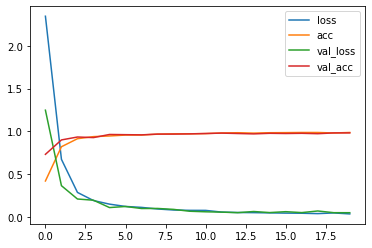

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    pred = np.argmax(pred,axis=-1)
    preds=np.append(preds,pred)
    y= np.argmax(y,axis=-1)
  
    ys=np.append(ys,y)
    
    
    
    

100%|██████████| 14/14 [00:01<00:00, 13.80it/s]


accuracy_score: 0.9818181818181818
precision_score: 0.9836580086580088
recall_score: 0.9818181818181818
f1_score: 0.9817220904249729


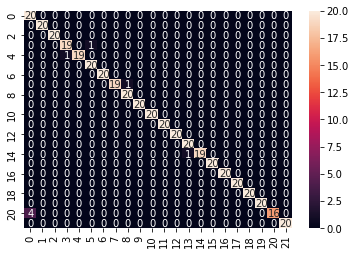

In [ ]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)

sn.heatmap(confion_metrix,annot=True)
